# Исследование рынка дата- и системных аналитиков сервиса hh.ru 

- Цель проекта: Выявить различия в предлагаемых вакансиях для Аналитиков данных и Системных аналитиков и сформулировать рекомендации по размещению или поиску подобных вакансий

- Источник данных: данные получены из API HH.ru

In [1]:
# импорт библиотек
import re
import pandas as pd
import matplotlib as mb
import numpy as np
from termcolor import colored
from decimal import Decimal
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
# сохраняем данные в датафреймы

da = pd.read_excel('C:/Аналитика_данных_ЯП/Aналитика_hh/vacancies_da.xlsx')
sa = pd.read_excel('C:/Аналитика_данных_ЯП/Aналитика_hh/vacancies_sa.xlsx')

In [3]:
# изучаем датафрейм по вакансиям дата аналитиков
print(da.info())

# смотрим столбцы с пропусками
print(da.isna().sum())

# выводим первые строки
da.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedule                          1801 non-null 

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация


In [4]:
# изучаем датафрейм по вакансиям системных аналитиков
print(sa.info())

# смотрим столбцы с пропусками
print(sa.isna().sum())

# выводим первые строки
sa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1915 non-null   int64         
 1   name                              1915 non-null   object        
 2   published_at                      1915 non-null   datetime64[ns]
 3   alternate_url                     1915 non-null   object        
 4   type                              1915 non-null   object        
 5   employer                          1915 non-null   object        
 6   department                        361 non-null    object        
 7   area                              1915 non-null   object        
 8   experience                        1915 non-null   object        
 9   key_skills                        1915 non-null   object        
 10  schedule                          1915 non-null 

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),"['1С', 'Аналитический склад ума', 'confluence'...",Полный день,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Разработка технических заданий', 'Бизнес-ана...",Удаленная работа,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация
2,100059559,Системный IT аналитик,2024-07-08 11:48:17,https://hh.ru/vacancy/100059559,Открытая,AMarkets,NaN,Москва,Junior+ (1-3 years),['Документация'],Полный день,Полная занятость,"мы - международная fintech компания amarkets, ...",международный fintech компания amarkets 2 7 го...,233750.0,NaN,ЗП не указана,NaN,NaN,Документация
3,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,https://hh.ru/vacancy/100063260,Открытая,Астор,NaN,Москва,Senior (6+ years),"['ERP', 'Atlassian Jira', '1С: Управление Прои...",Удаленная работа,Полная занятость,компания «астор» с 2000 года занимается разраб...,компания астор 2 год заниматься разработка вне...,NaN,NaN,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,Коммуникация
4,100064793,Системный аналитик,2024-07-08 16:39:40,https://hh.ru/vacancy/100064793,Открытая,Зетта Страхование,NaN,Москва,Junior+ (1-3 years),"['JSON', 'SQL', 'XML', 'SOAP', 'HTML', 'JS', '...",Полный день,Полная занятость,обязанности: анализ задач развития и сопрово...,обязанность анализ задача развитие сопровожден...,NaN,NaN,ЗП не указана,"SQL, C#, Java, JS, SOAP, JSON, XML, HTML, CSS",NaN,NaN


In [5]:
print('Дата-аналитик. Данные ОТ: ' + str(da['published_at'].min()))
print('Дата-аналитик. Данные ПО :' + str(da['published_at'].max()))

print('Системный аналитик. Данные ОТ: ' + str(sa['published_at'].min()))
print('Системный аналитик. Данные ПО: ' + str(sa['published_at'].max()))

Дата-аналитик. Данные ОТ: 2024-02-13 21:45:51
Дата-аналитик. Данные ПО :2024-06-11 15:07:30
Системный аналитик. Данные ОТ: 2024-06-27 06:08:10
Системный аналитик. Данные ПО: 2024-07-09 12:47:11


#### Вывод: 

Изучение данных по обеим позициям показало, что:

- больше всего вакансий размещается по системным аналитикам - количество записей по обоим датафреймам практически одинаковое, однако в случае дата-аналитиков мы имеем период размещения вакансий за 4 месяца, а в случае системных - чуть более месяца.
- в датафреймах содержатся пропуски в столбцах, связанных с департаментом места работы, требуемыми навыками и зарплатной вилкой. - типы данных почти в каждом столбце имеют подходящий формат, который не помешает проведению исследования. В дальнейшем коде формат для числовых значений (зарплата от и зарплата до) будет переведен из дробного в целочисленный, поскольку это классический и самый удобный формат представления ЗП, ЗП не принято указывать с точностью до копеек. Дата будет представлена в формате без указания времени, поскольку в формате текущего исследования такая детализация не требуется

### Предобработка данных

In [6]:
# устраним явные дубликаты
da = da.drop_duplicates()
sa = sa.drop_duplicates()

In [7]:
# приведем к общему формату все наименования компаний. Проверять на уникальность каждый не представляется возможным, у компании может быть любое название, но оно может быть написано в разных регистрах
da['employer'] = da['employer'].str.capitalize()
sa['employer'] = sa['employer'].str.capitalize()

In [8]:
# устраним неявные дубликаты 

# 1. Определим список столбцов, в которых могут встречаться неявные дубликаты
manual_dupl = ['type', 'area', 'experience', 'schedule','employment','salary_bin']

# 2.Выводим уникальные значения. Проверяем, чтобы не было неявных дублей 
print('Дата')
for i in manual_dupl:
    print()
    print(da[i].unique())

  
print()
print()
print('Системные')
for i in manual_dupl: 
    print()
    print(sa[i].unique())

Дата

['Открытая']

['Владивосток' 'Москва' 'Санкт-Петербург' 'Казань' 'Екатеринбург'
 'Смоленск' 'Новосибирск' 'Омск' 'Краснодар' 'Самара' 'Уфа' 'Нефтекамск'
 'Курган' 'Пермь' 'Ростов-на-Дону' 'Нижний Новгород' 'Чебоксары'
 'Владимир' 'Воронеж' 'Адыгейск' 'Тверь' 'Балашиха'
 'Киров (Кировская область)' 'Калининград' 'Тюмень' 'Челябинск' 'Майкоп'
 'Липецк' 'Красноярск' 'Горно-Алтайск' 'Дзержинский' 'Белгород' 'Ступино'
 'Рязань' 'Томск' 'Северск (Томская область)' 'Артем' 'Верхняя Пышма'
 'Щербинка' 'Кемерово' 'Подольск (Московская область)' 'Королев' 'Ижевск'
 'Вейделевка' 'Химки' 'Ульяновск' 'Иваново (Ивановская область)'
 'Луховицы' 'Златоуст' 'Набережные Челны' 'Байбек' 'Иркутск' 'Турочак'
 'Симферополь' 'Вельск' 'Алтайское' 'Сочи' 'Саратов' 'Оренбург' 'Псков'
 'Великие Луки' 'Магнитогорск' 'Пушкино (Московская область)' 'Мытищи'
 'Тула' 'Тольятти' 'Волгоград' 'Дмитров' 'Якутск' 'Одинцово']

['Junior (no experince)' 'Junior+ (1-3 years)' 'Middle (3-6 years)'
 'Senior (6+ years)']



In [9]:
# заполним пропуски

# 1. Работодатель/отдел. Строки исключены быть не могут, их слишком много. Заполнить аналогиями нельзя, только пометкой "не указан"

da['department'] = da['department'].fillna('нет данных')
sa['department'] = sa['department'].fillna('нет данных')

# 2. Зарплатная вилка. Сначала вычленяем стартовую и максимальную ЗП из столбца salary_bin:

def extract_salary(salary_bin):
    if 'ЗП не указана' in salary_bin:
        return None, None
    elif 'От' in salary_bin and 'до' in salary_bin:
        match = re.search(r'От (\d+) тысяч до (\d+) тысяч', salary_bin)
        if match:
            return int(match.group(1)) * 1000, int(match.group(2)) * 1000
    elif 'Меньше' in salary_bin:
        match = re.search(r'Меньше (\d+) тысяч', salary_bin)
        if match:
            return None, int(match.group(1)) * 1000
    elif 'Больше' in salary_bin:
        match = re.search(r'Больше (\d+) тысяч', salary_bin)
        if match:
            return int(match.group(1)) * 1000, None
    return None, None

da['salary_from_y'], da['salary_to_y'] = zip(*da['salary_bin'].apply(extract_salary))
sa['salary_from_y'], sa['salary_to_y'] = zip(*sa['salary_bin'].apply(extract_salary))

dframes = [da, sa]

for df in dframes:
    df.loc[df['salary_from'].isna(), 'salary_from'] = df.loc[df['salary_from'].isna(), 'salary_from_y']

# Удаление временных столбцов
for df in dframes:
    df.drop(columns=['salary_from_y', 'salary_to_y'], inplace=True)
    
# там , где не вычленилось - берем медиану в зависимости от опыта, загрузки и города

group_cols = ['area', 'experience', 'schedule', 'employment']
group_cols_cut = ['area', 'experience']

for df in dframes:
    df['salary_from'] = df.groupby(group_cols)['salary_from'].transform(lambda x: x.fillna(x.median()))
    df['salary_to'] = df.groupby(group_cols)['salary_to'].transform(lambda x: x.fillna(x.median()))
    print(df.isna().sum())

# иначе заполним без учета графика
for df in dframes:
    df['salary_from'] = df.groupby(group_cols_cut)['salary_from'].transform(lambda x: x.fillna(x.median()))
    df['salary_to'] = df.groupby(group_cols_cut)['salary_to'].transform(lambda x: x.fillna(x.median()))
    print(df.isna().sum())

# далее заполнение с учетом только города
for df in dframes:
    df['salary_from'] = df.groupby(by='area')['salary_from'].transform(lambda x: x.fillna(x.median()))
    df['salary_to'] = df.groupby(by='area')['salary_to'].transform(lambda x: x.fillna(x.median()))
    print(df.isna().sum())
    
# крайняя мера - медиана без группировки

for df in dframes:
    df['salary_from'].fillna(df['salary_from'].median(), inplace=True)
    df['salary_to'].fillna(df['salary_to'].median(), inplace=True)

id                                     0
name                                   0
published_at                           0
alternate_url                          0
type                                   0
employer                               0
department                             0
area                                   0
experience                             0
key_skills                             0
schedule                               0
employment                             0
description                            0
description_lemmatized                 0
salary_from                          109
salary_to                            174
salary_bin                             0
key_skills_from_key_skills_field     708
hard_skills_from_description        1383
soft_skills_from_description        1213
dtype: int64
id                                     0
name                                   0
published_at                           0
alternate_url                          0
typ

C:\Users\adyatlova\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\adyatlova\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\adyatlova\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\adyatlova\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\adyatlova\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=

id                                     0
name                                   0
published_at                           0
alternate_url                          0
type                                   0
employer                               0
department                             0
area                                   0
experience                             0
key_skills                             0
schedule                               0
employment                             0
description                            0
description_lemmatized                 0
salary_from                           57
salary_to                             95
salary_bin                             0
key_skills_from_key_skills_field     708
hard_skills_from_description        1383
soft_skills_from_description        1213
dtype: int64
id                                     0
name                                   0
published_at                           0
alternate_url                          0
typ

C:\Users\adyatlova\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\adyatlova\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\adyatlova\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\adyatlova\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\adyatlova\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=

In [10]:
# переведем значения в нужный тип данных и избавимся от аномалий (предварительно проверим, есть ли эти аномалии)

numeric_corrections = ['salary_to', 'salary_from']

for i in numeric_corrections:
    print(da[i].min())
    print(sa[i].min())
    da[i] = da[i].astype(int)
    sa[i] = da[i].astype(int)
    da[i] = da[i].abs()
    sa[i] = sa[i].abs()
    
# уберем время для упрощения визуального восприятия

da['published_at'] = da['published_at'].dt.normalize()
sa['published_at'] = sa['published_at'].dt.normalize()

25000.0
20000.0
50.0
280.0


#### Вывод: 

В данном разделе была проведена предобработка данных, которая состояла в:

1. Устранении явных и неявных дубликатов в значениях. Неявные дубликаты обнаружены не были
2. Все названия компаний были приведены к формату "с заглавной буквы". Ручная проверка через вывод уникальных значений по столбцу с наименованием компании не могжет быть осуществлена из-за большого количества таких значений. Таким образом были устранены потенциальные дубликаты в названиях компаний
3. Заполнении пропусков в столбцах с навыками, департаментами и ЗП. Поскольку в данном кейсе значения с департаментом и навыками могут быть самыми разнообразными пропуски были заполнены словом "нет данных". Пропуски в стратовой и максимальной ЗП были заполнены в 5 этапов: сначала вычленили данные из столбца salary_bin (зарплата ОТ и ДО), потом заполнили медианой в зависимости от опыта, загрузки и города, далее не учитывали график, потом заполняли только на основе медианы по городу. В крайнем случае заполнили оставшиеся пропуски медианой по всему датафрейму (условно, медианой по профессии - дата или системного аналитика)
4. изменили тип данных по описанному выше формату


### Исследовательский анализ данных

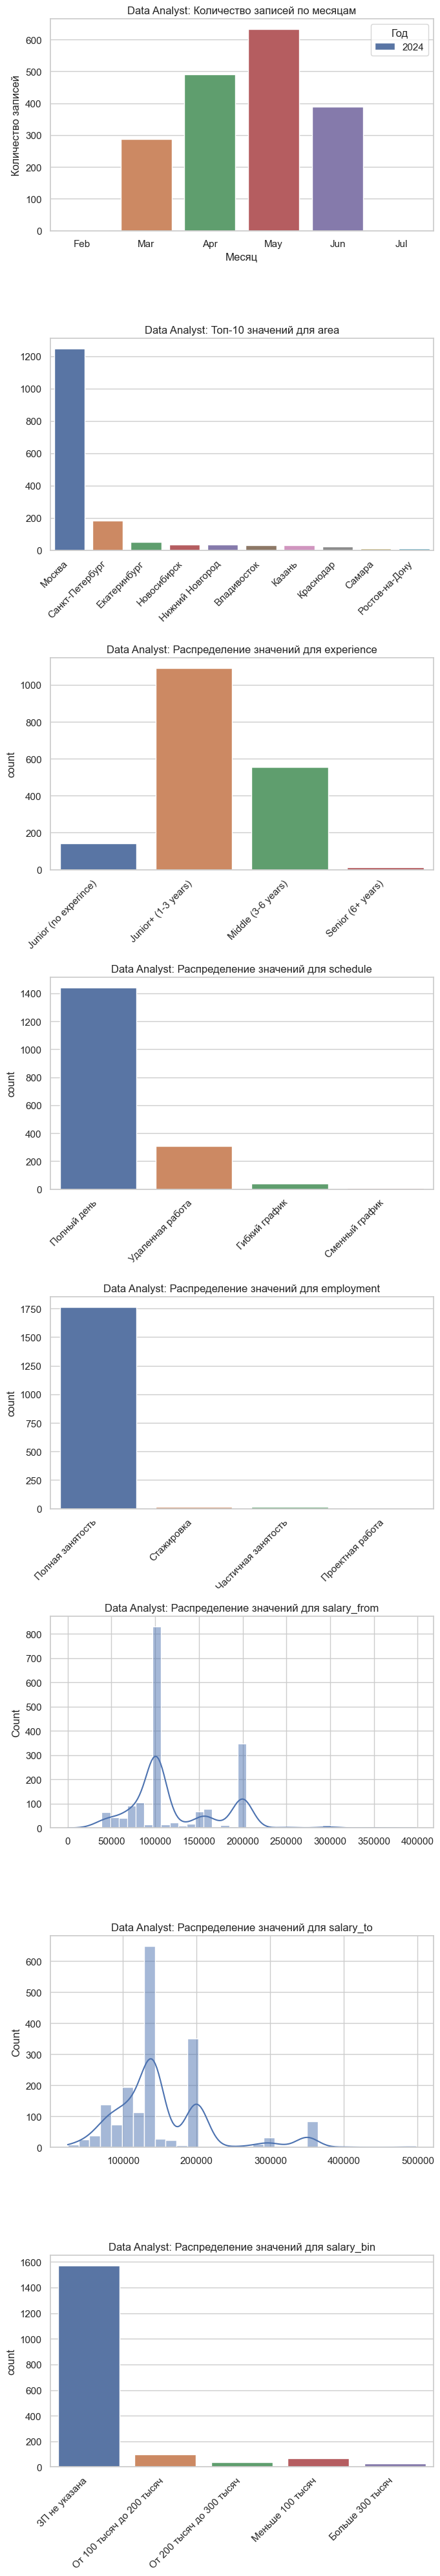

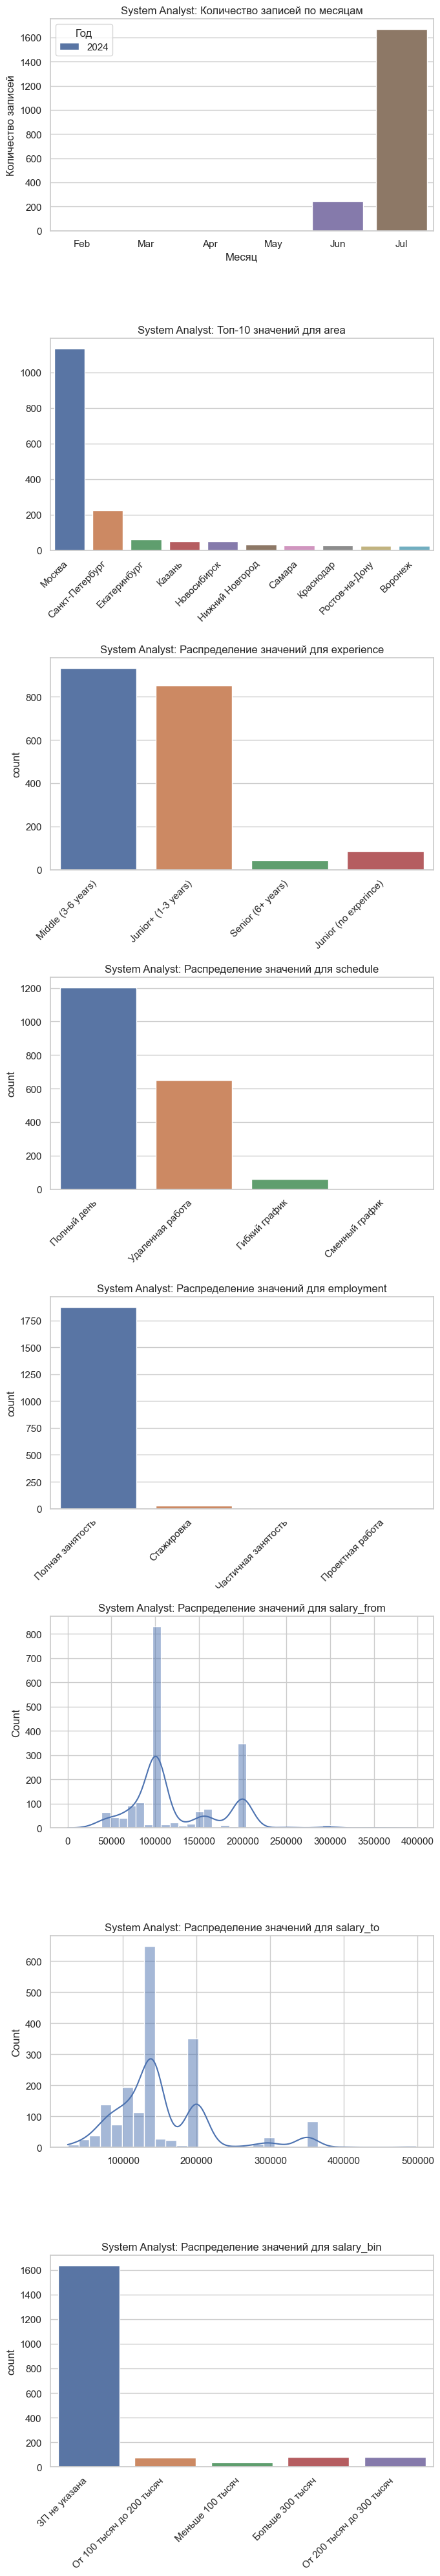

In [11]:
research_cols = ['published_at', 'area', 'experience', 'schedule', 'employment', 'salary_from', 'salary_to', 'salary_bin']

# Установим стиль для графиков
sns.set(style="whitegrid")

def plot_data(df, title_prefix):
    
    fig, axes = plt.subplots(len(research_cols), 1, figsize=(7, 5 * len(research_cols)))

    for i, col in enumerate(research_cols):
        
        ax = axes[i]
        
        if col == 'published_at':
            
            df[col] = pd.to_datetime(df[col])
            df['month'] = df[col].dt.strftime('%b')
            df['year'] = df[col].dt.year
            months = ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul']
            for year in df['year'].unique():
                yearly_data = df[df['year'] == year]
                monthly_counts = yearly_data['month'].value_counts().reindex(months, fill_value=0)
                sns.barplot(x=monthly_counts.index, y=monthly_counts.values, ax=ax, label=str(year))
            ax.set_title(f'{title_prefix}: Количество записей по месяцам')
            ax.set_xlabel('Месяц')
            ax.set_ylabel('Количество записей')
            ax.legend(title='Год')
            
        elif col == 'area':
            
            top_areas = df[col].value_counts().nlargest(10)
            sns.barplot(x=top_areas.index, y=top_areas.values, ax=ax)
            ax.set_title(f'{title_prefix}: Топ-10 значений для {col}')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
            ax.set_xlabel(None)
            
        elif col in ['experience', 'schedule', 'employment', 'salary_bin']:
            
            sns.countplot(data=df, x=col, ax=ax)
            ax.set_title(f'{title_prefix}: Распределение значений для {col}')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
            ax.set_xlabel(None)
            
        elif col in ['salary_from', 'salary_to']:
            
            sns.histplot(df[col].dropna(), kde=True, ax=ax)
            ax.set_title(f'{title_prefix}: Распределение значений для {col}')
            ax.set_xlabel(None)
            
        else:
            
            continue

    # Увеличим расстояние между подграфиками
    plt.tight_layout()
    plt.show()

# Визуализируем данные для датафрейма da
plot_data(da, 'Data Analyst')

# Визуализируем данные для датафрейма sa
plot_data(sa, 'System Analyst')

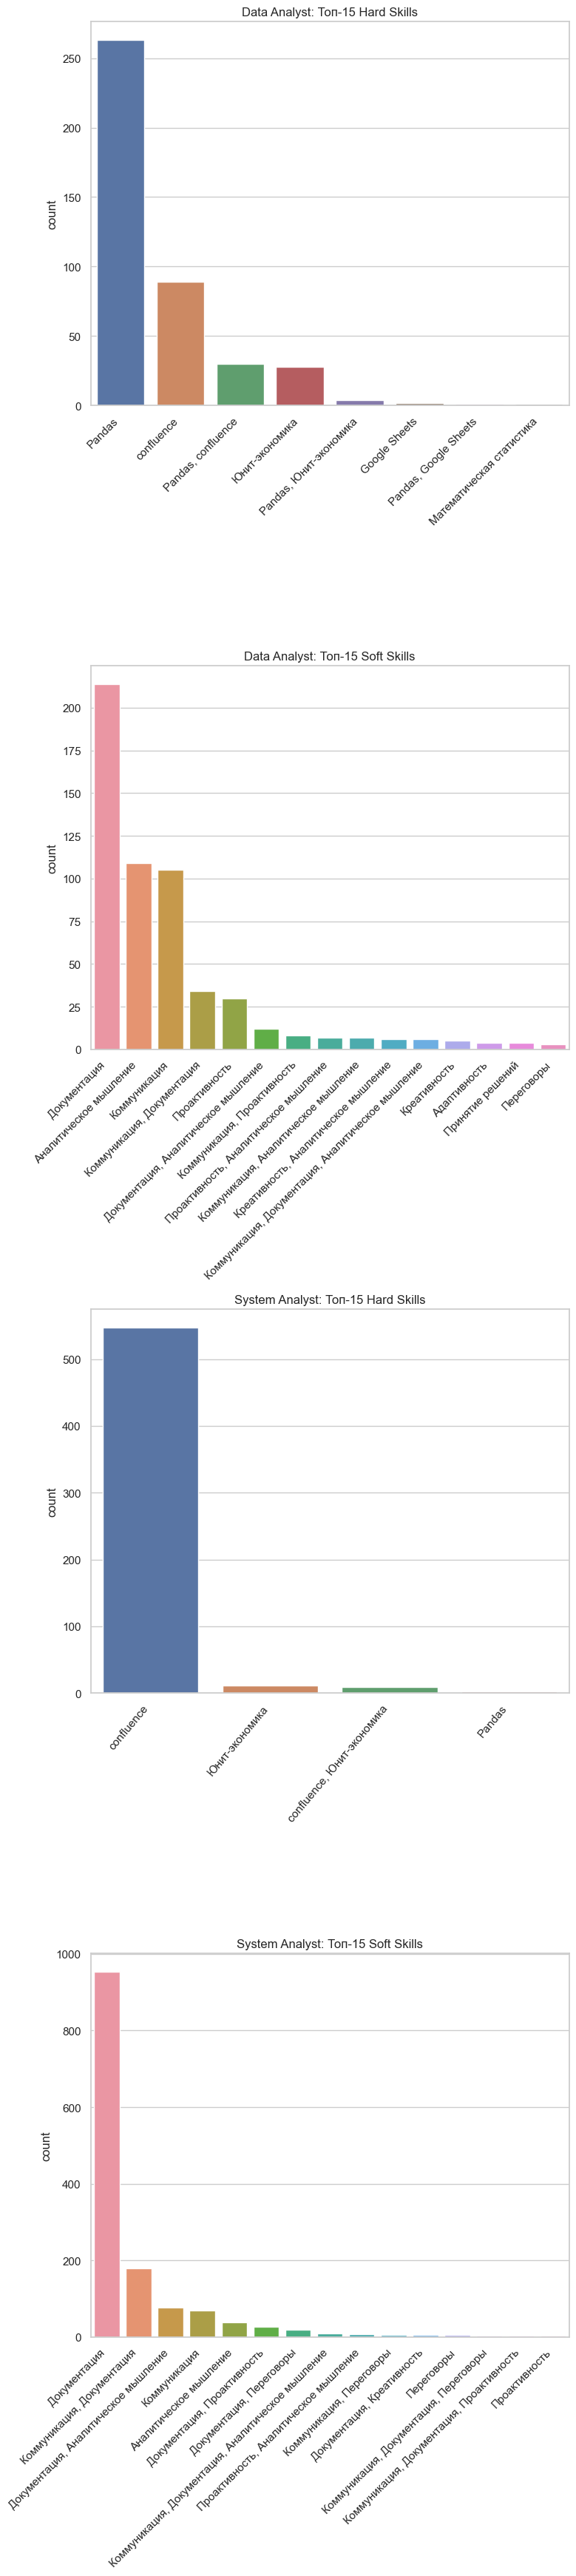

In [12]:
da_hard_skills = da['hard_skills_from_description'].dropna()
da_soft_skills = da['soft_skills_from_description'].dropna()

sa_hard_skills = sa['hard_skills_from_description'].dropna()
sa_soft_skills = sa['soft_skills_from_description'].dropna()

fig, axes = plt.subplots(4, 1, figsize=(8, 35)) 

sns.countplot(data=da_hard_skills, x=da_hard_skills, order=da_hard_skills.value_counts().index[:15], ax=axes[0])
axes[0].set_title('Data Analyst: Топ-15 Hard Skills')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_xlabel(None)

sns.countplot(data=da_soft_skills, x=da_soft_skills, order=da_soft_skills.value_counts().index[:15], ax=axes[1])
axes[1].set_title('Data Analyst: Топ-15 Soft Skills')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_xlabel(None)

sns.countplot(data=sa_hard_skills, x=sa_hard_skills, order=sa_hard_skills.value_counts().index[:15], ax=axes[2])
axes[2].set_title('System Analyst: Топ-15 Hard Skills')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=50, ha='right')
axes[2].set_xlabel(None)

sns.countplot(data=sa_soft_skills, x=sa_soft_skills, order=sa_soft_skills.value_counts().index[:15], ax=axes[3])
axes[3].set_title('System Analyst: Топ-15 Soft Skills')
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=45, ha='right')
axes[3].set_xlabel(None)

plt.tight_layout()
plt.show()

#### Вывод: 

Графиками выше было подготовлено исследование общих данных без предварительного разделения по отдельным категориям. Мы исследовали количество вакансий по каждому из столбцов, содержащих категориальные значения (за исключением наименований компаний, так как они имеют большое количество уникальных значений). 

Исследование показало, что:

1. По дата-аналитикам в датафрейме содержатся данные за период с марта по июнь 2024 года. Больше всего вакансия было размещено в мае, меньше всего - в марте. Датафрейм с системными аналитиками имеет записи только по июню и июлю, при этом в июне история данных начинается с 27.06.24, что объясняет такое сильное отличие в количестве вакансий за июль и июнь
2. В обоих датафреймах больше всего вакансий было размещено в Москве, на втором месте Санкт-Петербург, а на третьем - в Екатеринбурге. Данные представлены в формате ТОП-10 городов по количеству вакансий
3. На дата-аналитика чаще всего размещали вакансии с требуемым опытом 1-3 года, на втором месте вакансии с требуемым опытом 3-6 лет. Реже всего размещали вакансии по сеньорам с 6+ летним стажем. По системному аналитику миддлов искали немного чаще, чем джунов с опытом, а сеньоры требовались чаще, чем джуны без опыта.
4. В обоих случаях преимущественно искали работников на полный рабочий день, со сменным графиком записей практически нет.
5. В обоих случаях в подавляющем большинстве специалистов искали на полный рабочий день. Об остальных графиках записей практически нет
6. Распределение зарплатной вилки для дата аналитиков +- одинаковое: в среднем предлагается от 100 до 200 т.рублей. Данные по столбцу с зарплатной вилке мы так же визуализировали, однако их использование не имеет никакого смысла - видим, что пропусков слишком много
7. Софт-скиллы для обейх позиций +- одинаковы, а требования к хард-скиллам , ожидаемо, расходятся: аналитики данных в первую очередь знать python, а системные - платформы , содержащие "базу знаний" по бизнес-процессам

### Анализ данных по группам грейда

#### Распределение навыков

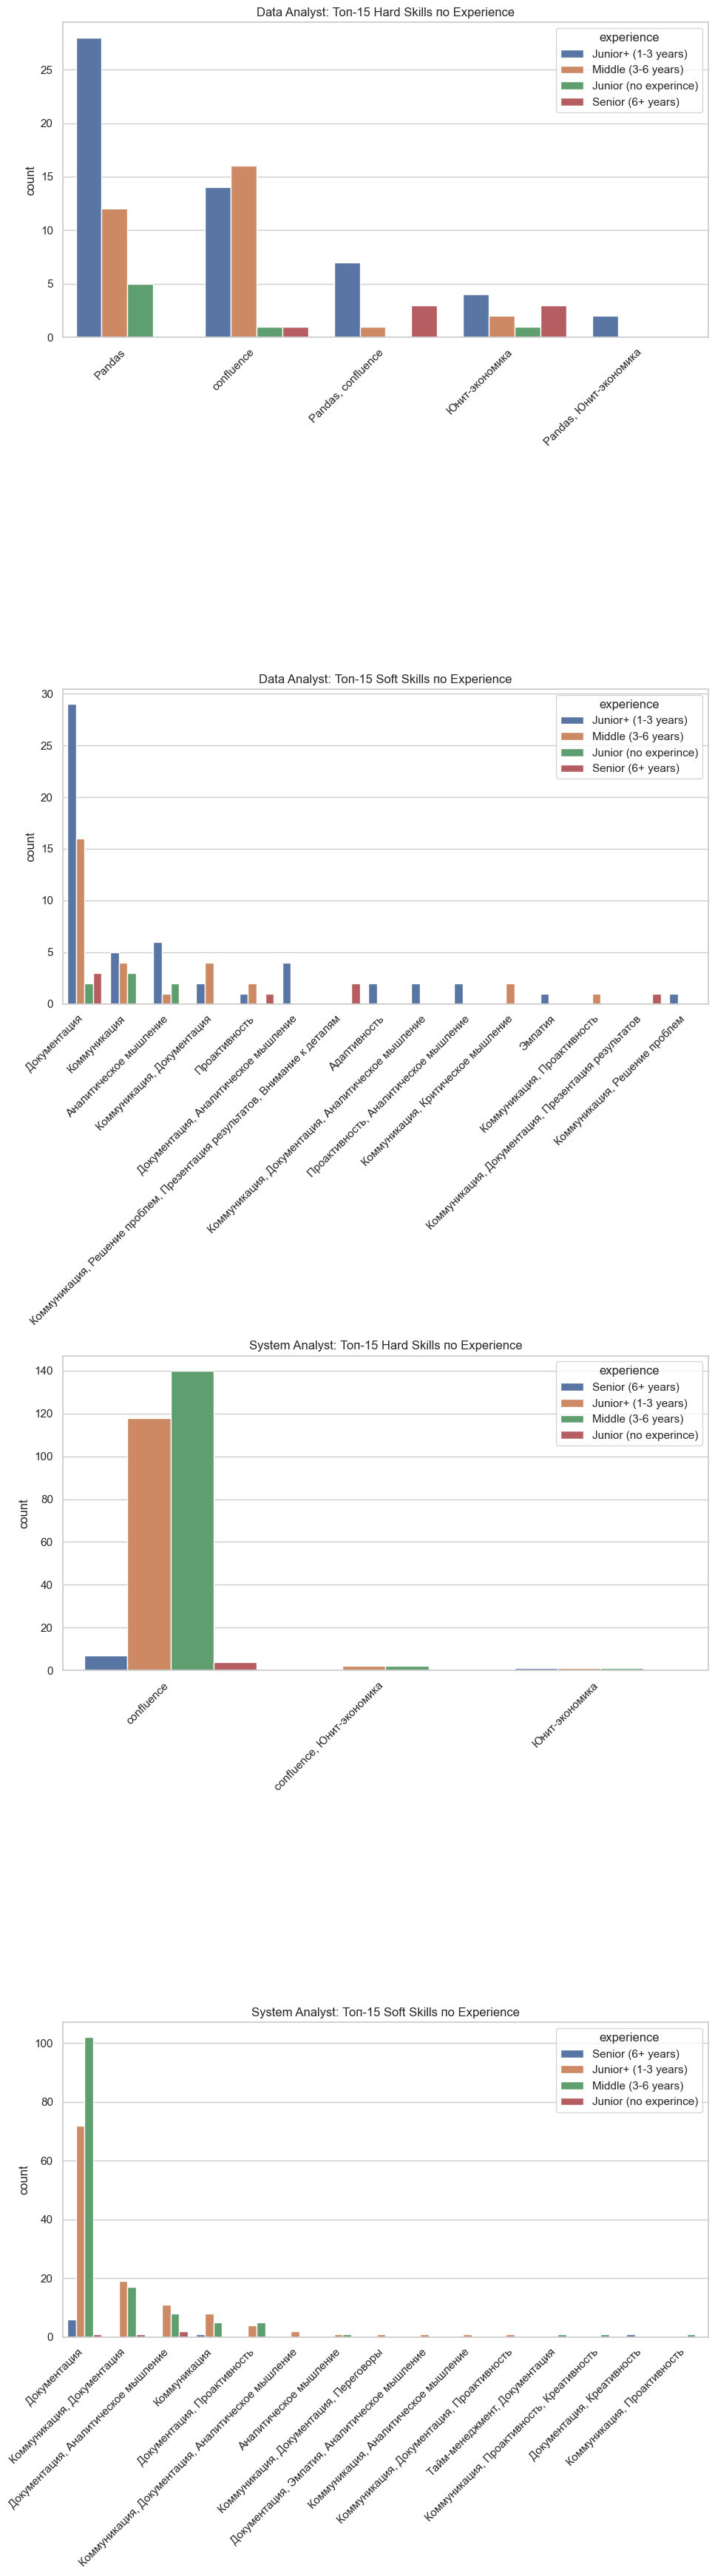

In [13]:
# Группируем хард и софт скиллы по уровню опыта
da_grouped_hard_skills = da.explode('hard_skills_from_description').dropna()
da_grouped_soft_skills = da.explode('soft_skills_from_description').dropna()

sa_grouped_hard_skills = sa.explode('hard_skills_from_description').dropna()
sa_grouped_soft_skills = sa.explode('soft_skills_from_description').dropna()

fig, axes = plt.subplots(4, 1, figsize=(10, 35))

# График для хард скиллов Data Analyst
sns.countplot(data=da_grouped_hard_skills, x='hard_skills_from_description', hue='experience',
              order=da_grouped_hard_skills['hard_skills_from_description'].value_counts().index[:15], ax=axes[0])
axes[0].set_title('Data Analyst: Топ-15 Hard Skills по Experience')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_xlabel(None)

# График для софт скиллов Data Analyst
sns.countplot(data=da_grouped_soft_skills, x='soft_skills_from_description', hue='experience',
              order=da_grouped_soft_skills['soft_skills_from_description'].value_counts().index[:15], ax=axes[1])
axes[1].set_title('Data Analyst: Топ-15 Soft Skills по Experience')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_xlabel(None)

# График для хард скиллов System Analyst
sns.countplot(data=sa_grouped_hard_skills, x='hard_skills_from_description', hue='experience',
              order=sa_grouped_hard_skills['hard_skills_from_description'].value_counts().index[:15], ax=axes[2])
axes[2].set_title('System Analyst: Топ-15 Hard Skills по Experience')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')
axes[2].set_xlabel(None)

# График для софт скиллов System Analyst
sns.countplot(data=sa_grouped_soft_skills, x='soft_skills_from_description', hue='experience',
              order=sa_grouped_soft_skills['soft_skills_from_description'].value_counts().index[:15], ax=axes[3])
axes[3].set_title('System Analyst: Топ-15 Soft Skills по Experience')
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=45, ha='right')
axes[3].set_xlabel(None)

plt.tight_layout()
plt.show()

#### Вывод:

Особенных паттернов в зависимости навыков от опыта не замечено - такие распределение можно объяснить распределением вакансий по опыту (как это было проанализировано выше)

#### ТОП-работодателей, зарплата, тип занятости и график работы

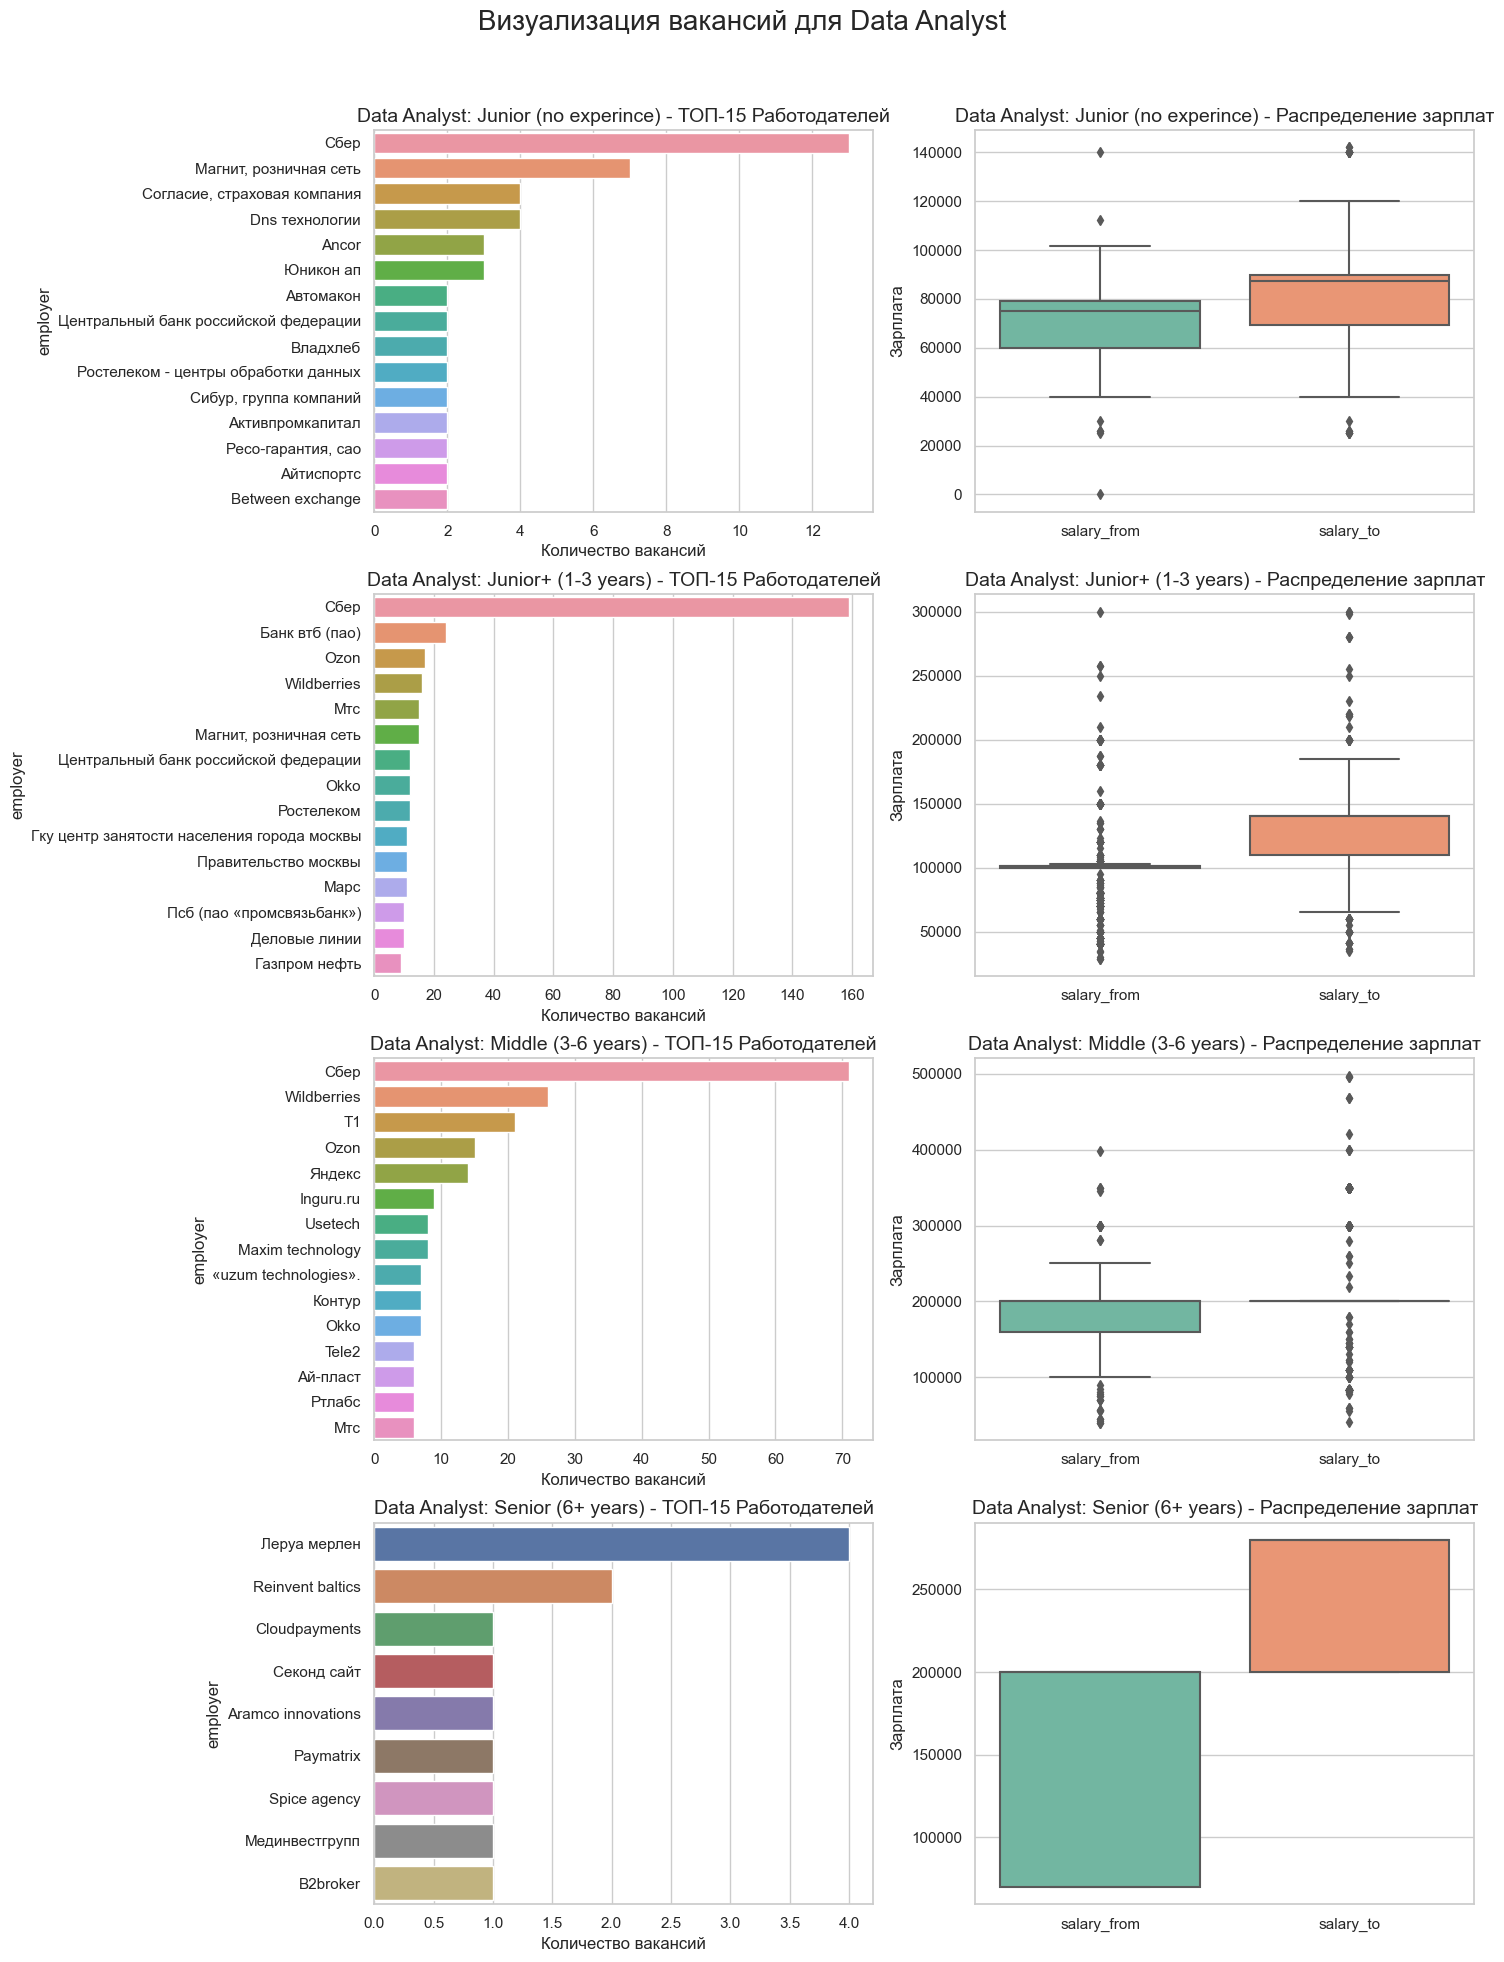

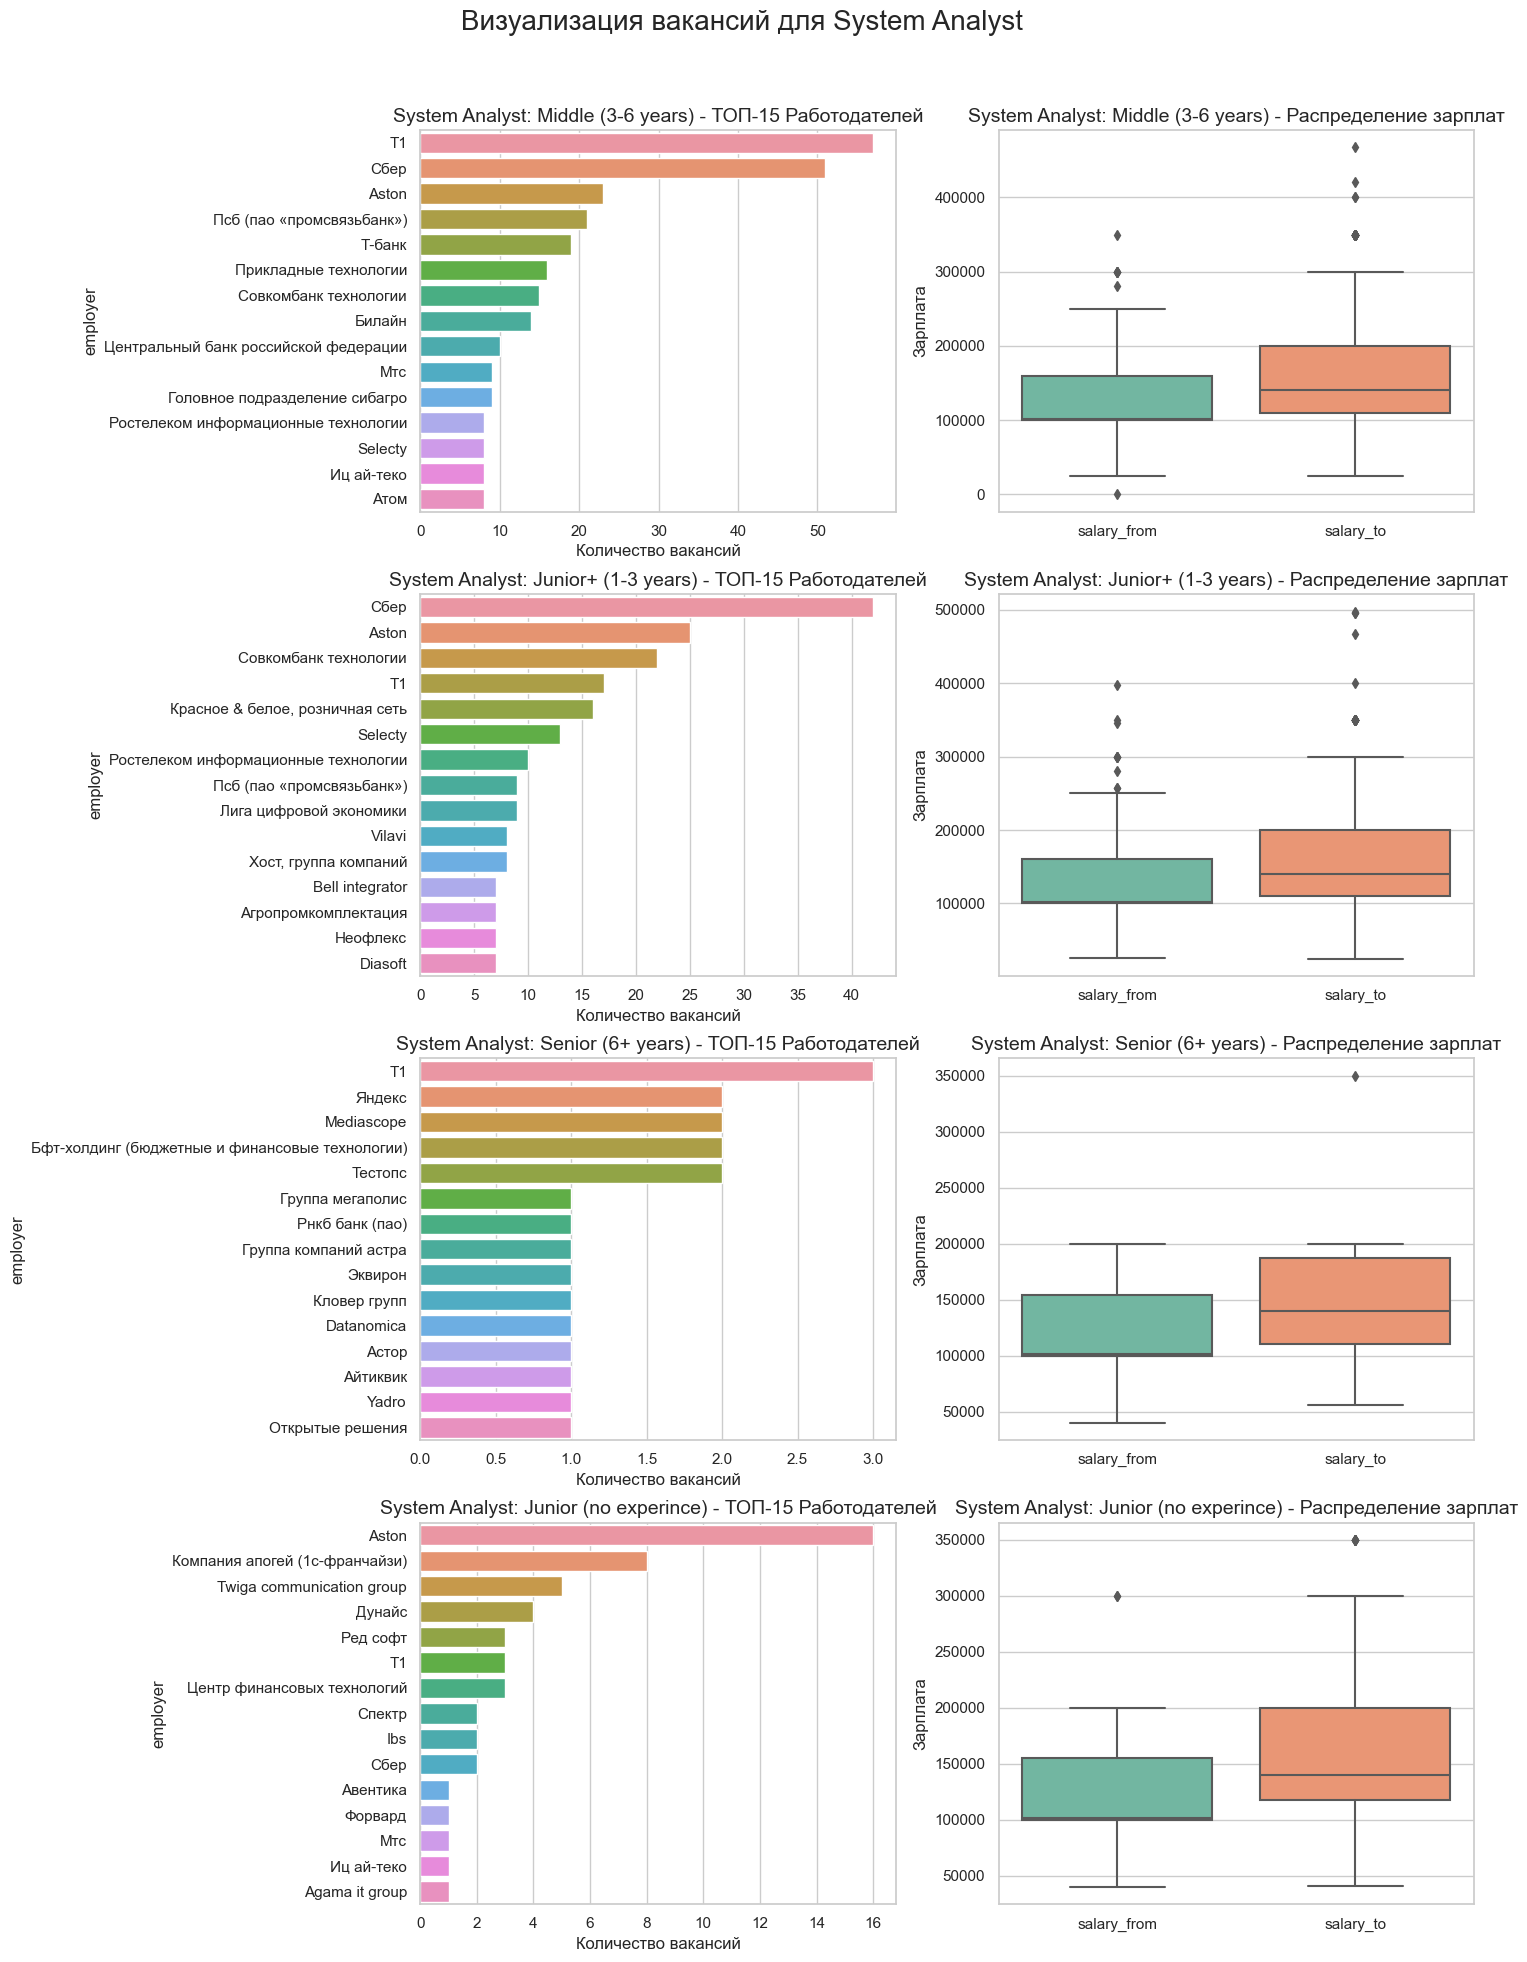

In [14]:
sns.set(style="whitegrid")

# Функция для визуализации данных
def plot_analytics(df, title_prefix):
    experience_levels = df['experience'].unique()  # Уникальные уровни опыта
    fig, axes = plt.subplots(len(experience_levels), 2, figsize=(15, 5 * len(experience_levels)))

    for i, experience in enumerate(experience_levels):
        # ТОП-работодатели
        top_employers = df[df['experience'] == experience]['employer'].value_counts().nlargest(15)
        sns.barplot(x=top_employers.values, y=top_employers.index, ax=axes[i, 0])
        axes[i, 0].set_title(f'{title_prefix}: {experience} - ТОП-15 Работодателей', fontsize=14)
        axes[i, 0].set_xlabel('Количество вакансий', fontsize=12)

        # Боксплот для зарплаты
        salary_data = df[df['experience'] == experience][['salary_from', 'salary_to']]
        sns.boxplot(data=salary_data, ax=axes[i, 1], palette="Set2")
        axes[i, 1].set_title(f'{title_prefix}: {experience} - Распределение зарплат', fontsize=14)
        axes[i, 1].set_ylabel('Зарплата', fontsize=12)

    plt.tight_layout()
    plt.suptitle(f'Визуализация вакансий для {title_prefix}', fontsize=20)
    plt.subplots_adjust(top=0.92)
    plt.show()

# Визуализируем данные для Дата-аналитиков
plot_analytics(da, 'Data Analyst')

# Визуализируем данные для Бизнес-аналитиков
plot_analytics(sa, 'System Analyst')

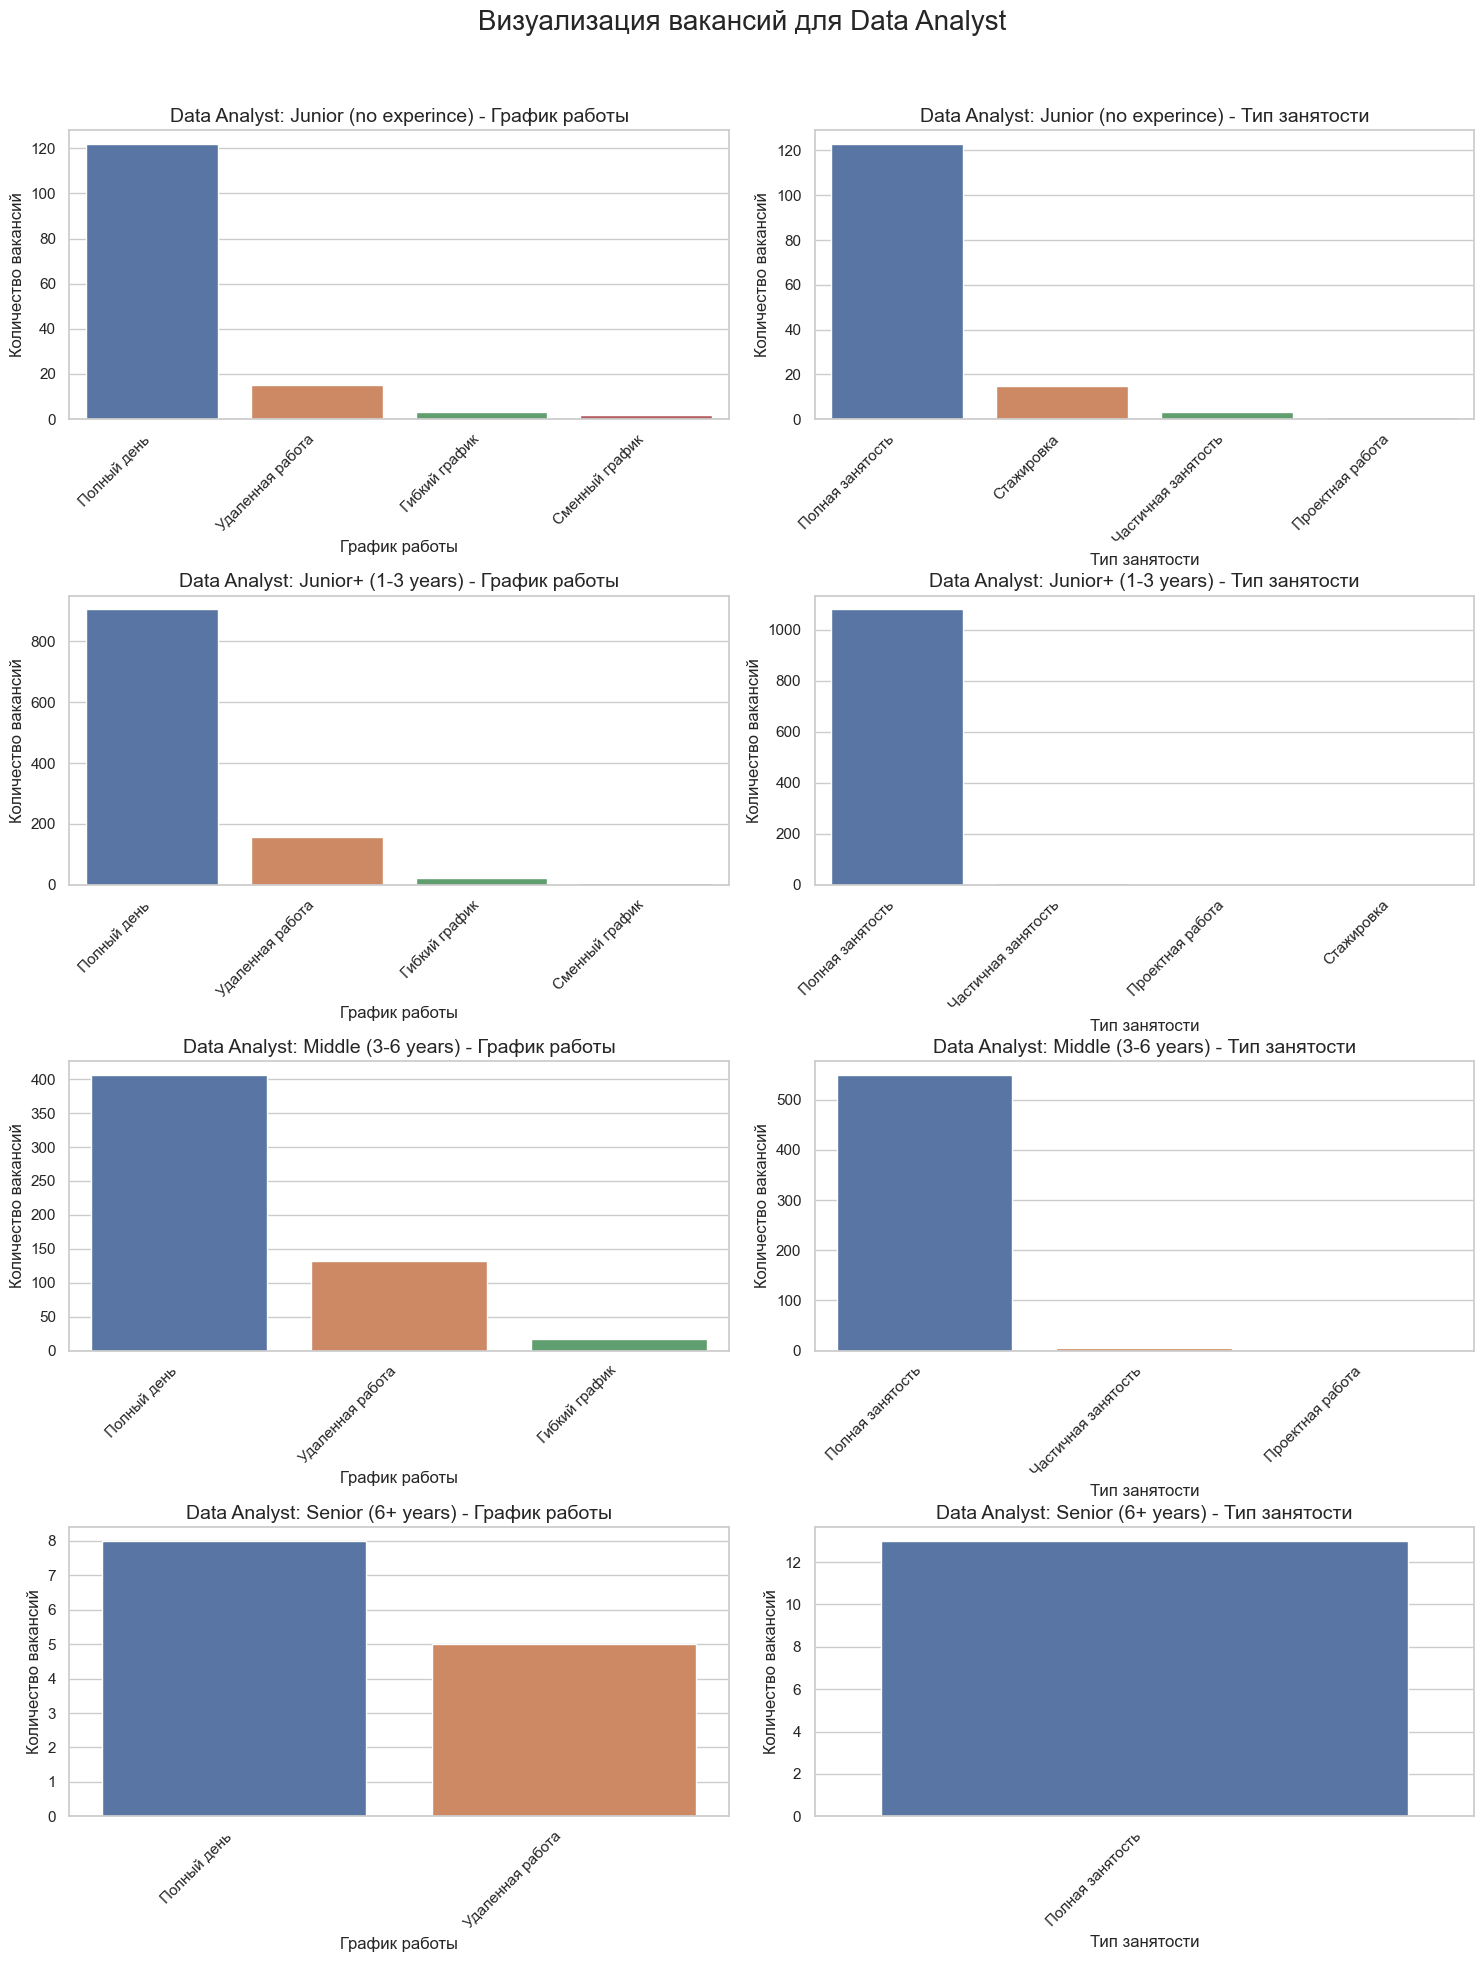

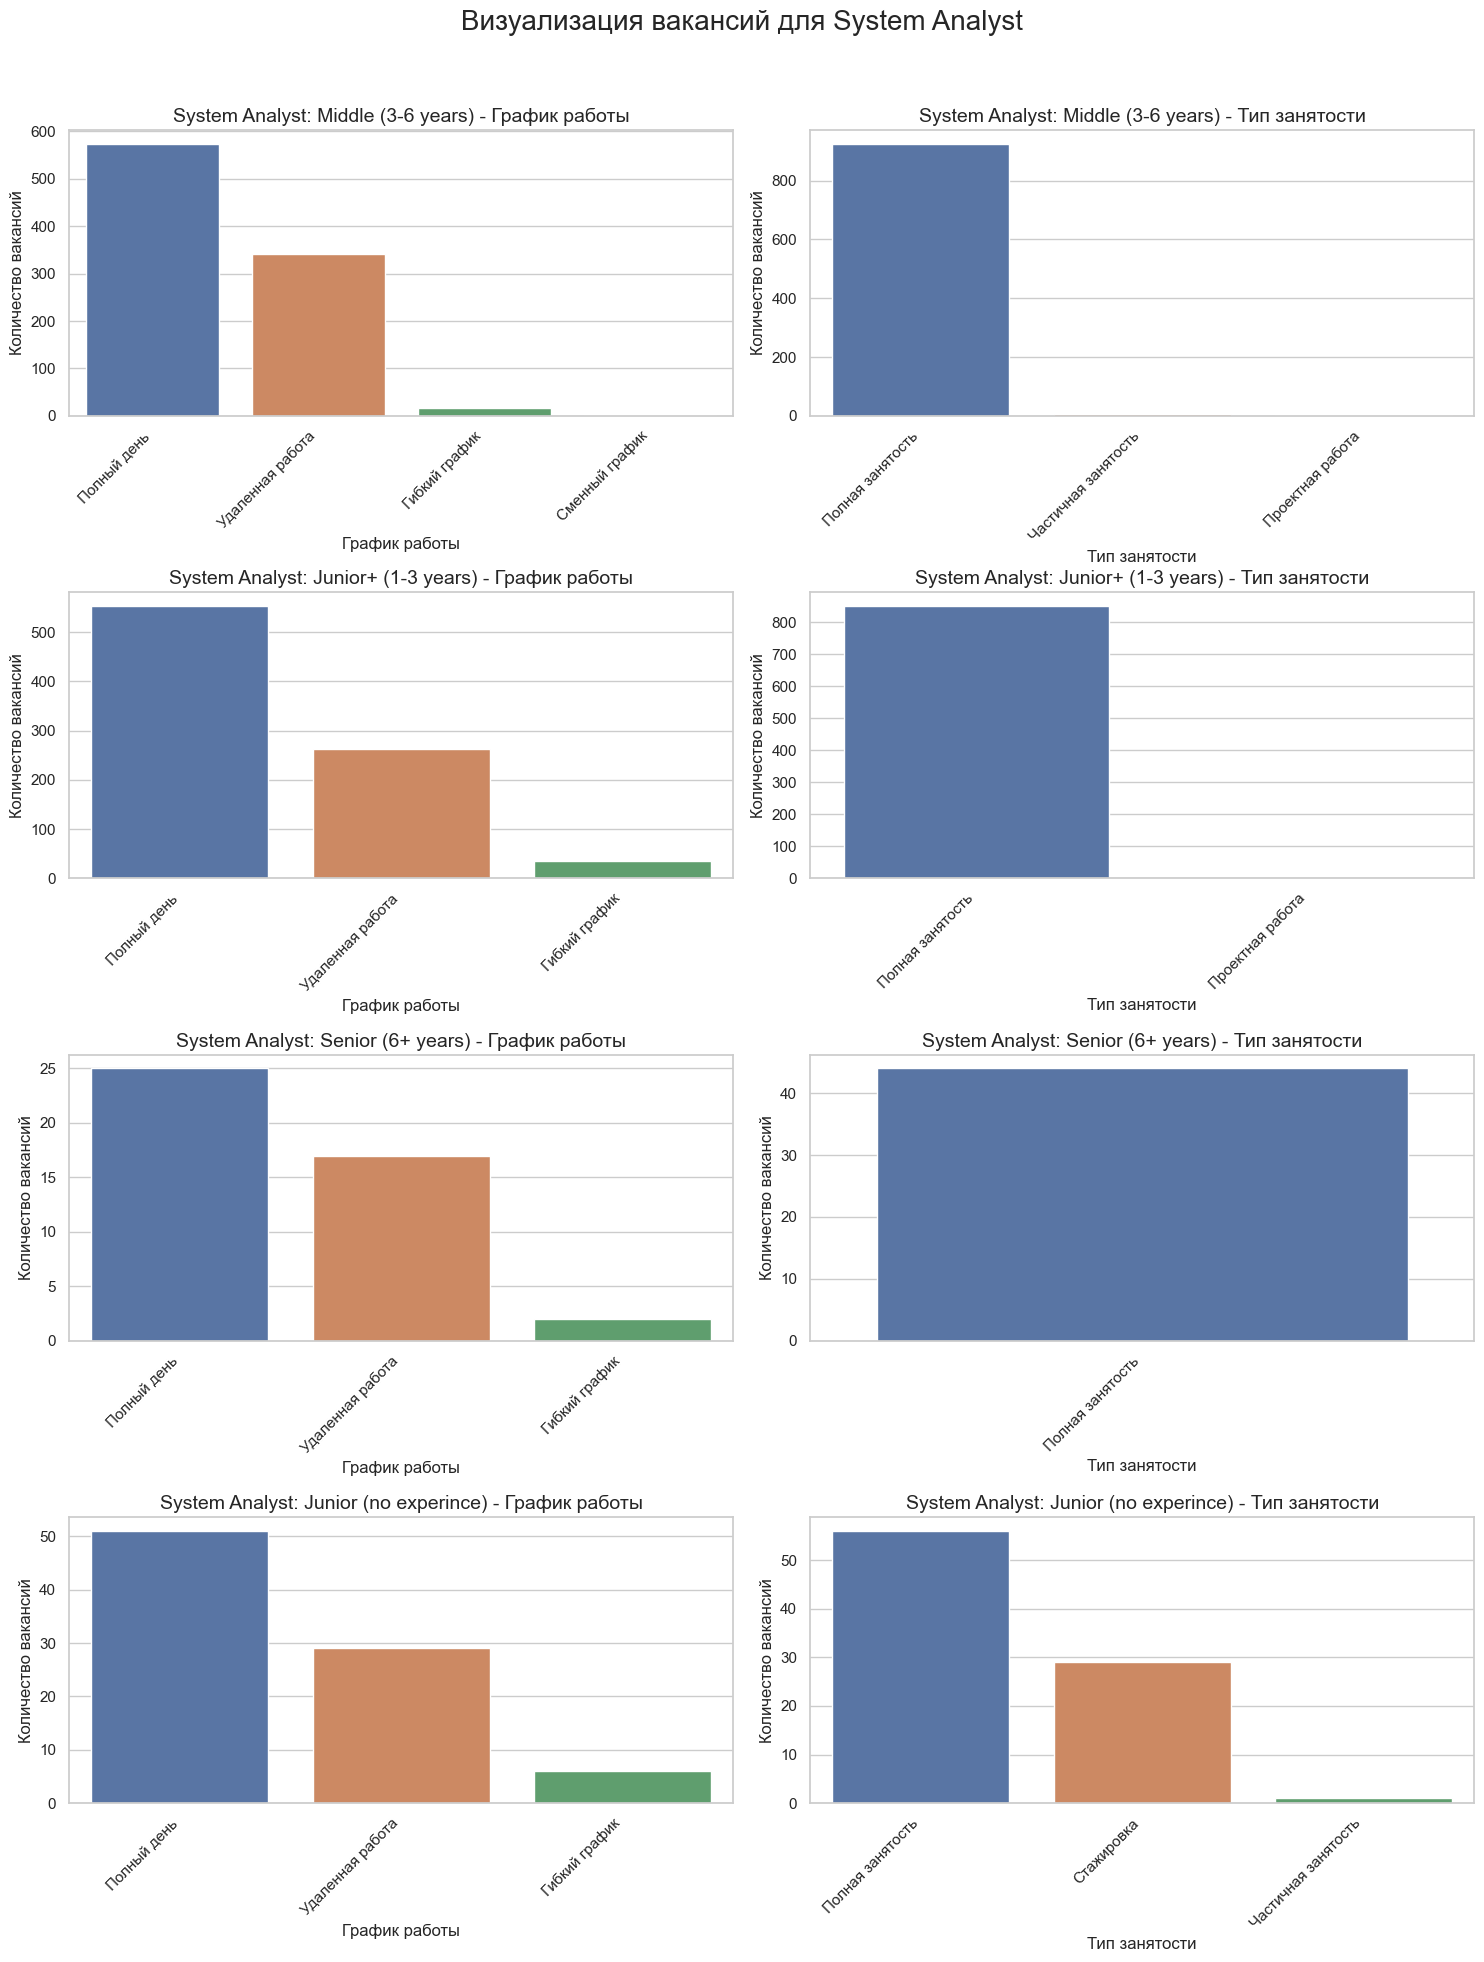

In [15]:
sns.set(style="whitegrid")

# Функция для визуализации Графиков работы и Типов занятости
def plot_schedule_and_employment(df, title_prefix):
    experience_levels = df['experience'].unique()  # Уникальные уровни опыта
    fig, axes = plt.subplots(len(experience_levels), 2, figsize=(15, 5 * len(experience_levels)))

    for i, experience in enumerate(experience_levels):
        # Распределение графиков работы
        schedule_types = df[df['experience'] == experience]['schedule'].value_counts()
        sns.barplot(x=schedule_types.index, y=schedule_types.values, ax=axes[i, 0])
        axes[i, 0].set_title(f'{title_prefix}: {experience} - График работы', fontsize=14)
        axes[i, 0].set_ylabel('Количество вакансий', fontsize=12)
        axes[i, 0].set_xlabel('График работы', fontsize=12)
        axes[i, 0].set_xticklabels(axes[i, 0].get_xticklabels(), rotation=45, ha='right')

        # Распределение типов занятости
        employment_types = df[df['experience'] == experience]['employment'].value_counts()
        sns.barplot(x=employment_types.index, y=employment_types.values, ax=axes[i, 1])
        axes[i, 1].set_title(f'{title_prefix}: {experience} - Тип занятости', fontsize=14)
        axes[i, 1].set_ylabel('Количество вакансий', fontsize=12)
        axes[i, 1].set_xlabel('Тип занятости', fontsize=12)
        axes[i, 1].set_xticklabels(axes[i, 1].get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.suptitle(f'Визуализация вакансий для {title_prefix}', fontsize=20)
    plt.subplots_adjust(top=0.92)
    plt.show()

# Визуализируем график работы и тип занятости для Дата-аналитиков
plot_schedule_and_employment(da, 'Data Analyst')

# Визуализируем график работы и тип занятости для Бизнес-аналитиков
plot_schedule_and_employment(sa, 'System Analyst')

#### Вывод:

1. Больше всего вакансий размещал Сбербанк: он вышел на первое место почти во всех группах дата-аналитиков (за исключением сеньоров, их больше всего разыскивал Леруа Мерлен). Системных аналитиков с опытом более 3х лет больше всего искала компания Т1, Сбер активнее всех прочих искал системных аналитиков с опытом от 1 до 3х лет. Без опыта же системных аналитиков больше всего была готова принять компания Aston
2. Распределение ЗП показало большое отличие в ЗП на страте карьеры между дата- и системными аналитиками: первые без опыта получают от 60 до 80 тыс. руб., а системным сразу предлагают от 100 до 200. Однако далее видно, что такая вилка сохраняется и на всех остальных системных аналитиках вне зависимости от их опыта - все так же 100-200 тысяч. А вот ЗП дата-аналитика по мере набора опыта стабильно растет - джун с опытом может рассчитывать уже на ЗП от 100 до 150 тысяч, миддл может получать от 150 до 200 тысяч. Сеньоры дата-аналитики имеют самый большой разброс по ЗП (скорее всего он связан с маленьким количеством вакансий по сеньорам в принципе): их ЗП может начинаться от 50 тысяч и до 300 тысяч рублей
3. Картина по графику и занятости показывает, что особенной разницы между системными и дата-аналитиками нет: везде нужны сотрудники преимущественно на полный день и на полную занятость. Разве что системным аналитикам без опыта чаще разрешают работать удаленно и стажироваться. По мере набора опыта дата-аналитик получает все больше возможностей уйти на "удаленку"

#### Расчет помесячной динамики количества вакансий

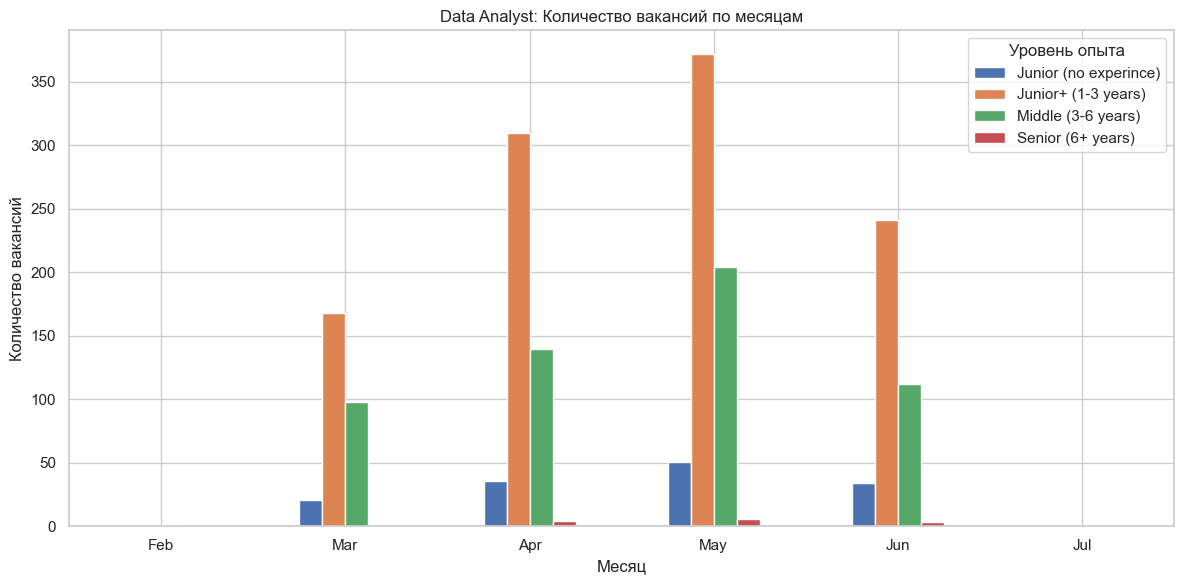

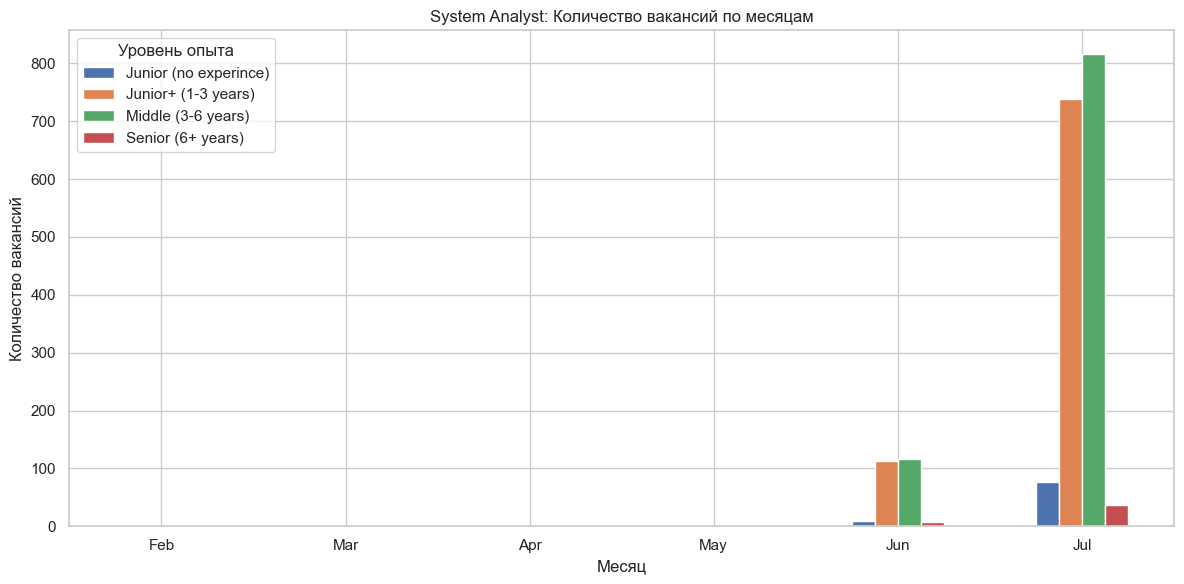

In [16]:
def plot_monthly_experience(df, title_prefix):
    # Преобразование в datetime и создание новых столбцов
    df['published_at'] = pd.to_datetime(df['published_at'])
    df['month'] = df['published_at'].dt.strftime('%b')
    df['year'] = df['published_at'].dt.year
    
    # Определяем месяцы
    months = ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul']
    
    # Создаем график
    plt.figure(figsize=(12, 6))
    
    # Обрабатываем данные для графика
    monthly_counts = df.groupby(['month', 'experience']).size().unstack(fill_value=0)
    monthly_counts = monthly_counts.reindex(months)
    
    # Создаем график
    monthly_counts.plot(kind='bar', ax=plt.gca())
    
    # Настройка графика
    plt.title(f'{title_prefix}: Количество вакансий по месяцам')
    plt.xlabel('Месяц')
    plt.ylabel('Количество вакансий')
    plt.xticks(rotation=0)
    plt.legend(title='Уровень опыта')
    plt.tight_layout()
    plt.show()

# Пример использования для дата-аналитиков и бизнес-аналитиков
plot_monthly_experience(da, 'Data Analyst')
plot_monthly_experience(sa, 'System Analyst')

#### Вывод: 

Распределение по месяцам в обоих случаях имеет стабильную динамику, от месяца к месяцу распределение долей запрашиваемых кандидатов не меняется

### Общий вывод:

Исследование показало не так много различий между двумя профессиями. Самые ярко выраженные из них: заработная плата и динамика ее эволюции в зависимости от количества опыта и набор хард-скиллов.

### Рекомендации

#### Для работодателей

1. С точки зрения предложения рабочей силы рекомендуется сместить ориентир на поиск кадров из регионов. Рынок Москвы переполнен предложениями, особенно по офисной работе. Можно проработать модель обучения и адаптации в коллектив удаленного сотрудника, который ищет работу по городу своего проживания. Удаленный формат позволяет московским компаниям нанимать сотрудников с любой точки РФ
2. Дата-аналитика в целом гораздо проще найти, чем системного: на 4 месяца размещения вакансий дата-аналитика приходится 1 месяц вакансий на системного аналитика. В таком случае можно рассматривать и офисный формат работы
3. В формировании зарплатной вилки точно стоит учесть тенденции рынка и не предлагать меньше среднего значения (не менее 60 т.р. на старте у дата-аналитиков и не менее 100 т.р. у системных) . Также нужно следить за своевременным финансовом продвижении сотрудника по мере накопления его опыта, так как набрав его он может претендовать на более высокую оплату труда и уйти к конкурентам.
4. В случае нехватки финансовых ресурсов, чтобы составить конкуренцию крупным компаниям, следует рассмотреть вариант с привлечением стажеров. Данные показали, что не так часто прелагают стажироваться по сравнению со стандартной работой на полную занятость, поэтому этот рынок формата работы относительно свободен

#### Для соискателей

1. Москва , Санкт-Петербург и Екатеринбург - самые насыщенные вакансиями рынки, особенно Москва. Можно рассматривать как вариант с релокацией в данные города, так и поиск удаленной работы с указанной локацией в данных городах - иногда работодатель указывает город главного офиса, но не ищет офисного сотрудника
2. Стоит обратить внимание на Сбер, как на компанию самую заинтересованную в таких аналитиках. В случае, если опыта работы системным аналитиком нет - можно так же изучить вакансии в компании Aston
3. Дата-аналитикам в первую очередь заполнить "пробоины" в знании python , поскольку его с кандидата спрашивают чаще всего. Системному же аналитику будет полезно "прокачаться" в такой платформе , как "confluence" и юнит-экономике